**1. Data Collection**

In [ ]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<ipython-input-12-0413f14b673e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data, x='Survived', y='Sex', inner='box', palette='Dark2')


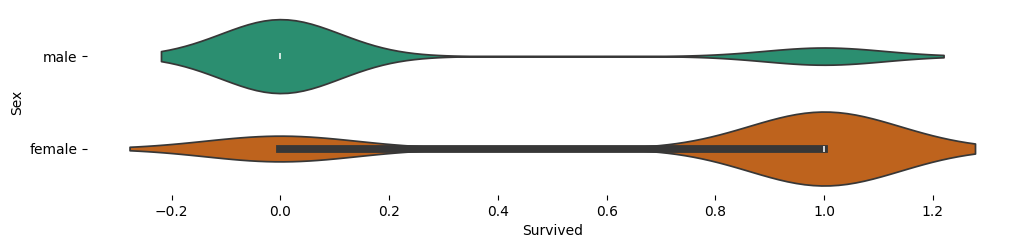

In [ ]:
# @title Sex vs Survived

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(train_data['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_data, x='Survived', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**2. Data Preprocessing**

Handle missing values and encode categorical variables.

In [ ]:
# Fill missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)


In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:

# Drop columns that won't be used for prediction
train_data.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1, inplace=True)


In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:

# Encode categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


**3. Feature Engineering**

Create new features if necessary.

In [ ]:
# Create a new feature 'FamilySize'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)


In [ ]:
train_data

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize
0,0,3,22.0,7.2500,True,False,True,2
1,1,1,38.0,71.2833,False,False,False,2
2,1,3,26.0,7.9250,False,False,True,1
3,1,1,35.0,53.1000,False,False,True,2
4,0,3,35.0,8.0500,True,False,True,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,True,False,True,1
887,1,1,19.0,30.0000,False,False,True,1
888,0,3,28.0,23.4500,False,False,True,4
889,1,1,26.0,30.0000,True,False,False,1


**4. Exploratory Data Analysis (EDA)**

Analyze the data to understand which features are important.

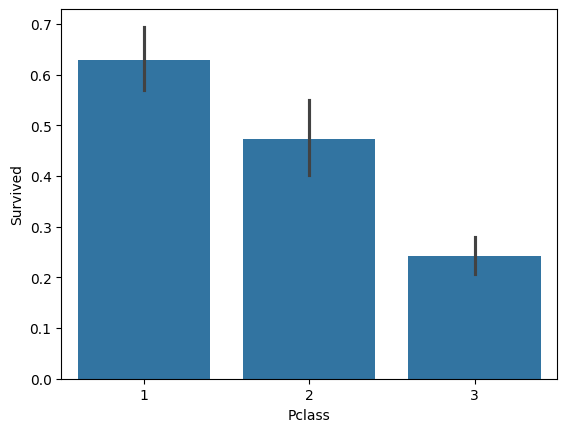

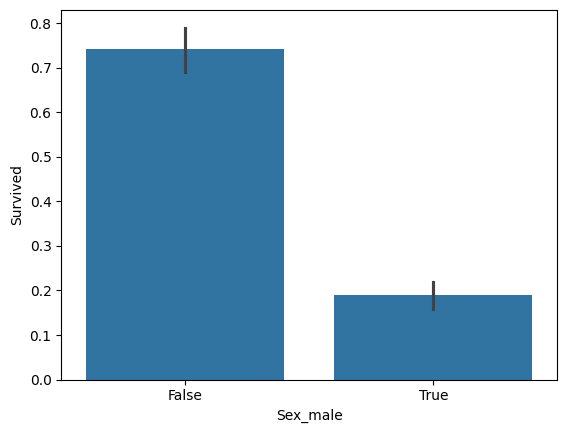

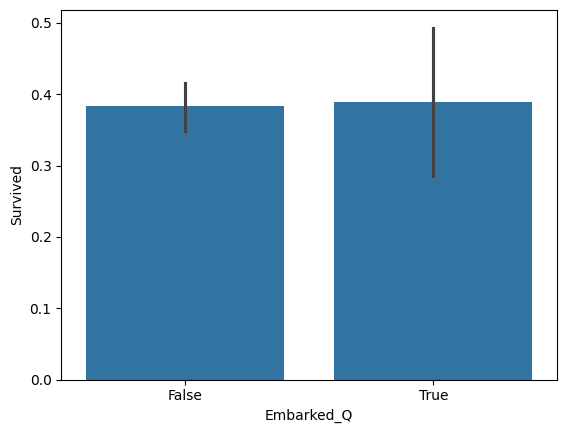

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival rate by different features
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.show()

sns.barplot(x='Sex_male', y='Survived', data=train_data)
plt.show()

sns.barplot(x='Embarked_Q', y='Survived', data=train_data)
plt.show()


**5. Model Building**

Train a classification model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [ ]:
# Split the data into training and validation sets
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
# Train a RandomForest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:

# Predict on the validation set
y_pred = model.predict(X_val)



In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8268156424581006
Precision: 0.8028169014084507
Recall: 0.7702702702702703
F1 Score: 0.7862068965517242
